In [37]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [38]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [39]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [40]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite", echo = False)

In [41]:
# reflect an existing database into a new model
# reflect the tables
# View all of the classes that automap found

Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()

['measurement', 'station']

In [42]:
# Save references to each table

measur = Base.classes.measurement
stn = Base.classes.station

In [43]:
# Create our session (link) from Python to the DB

session = Session(engine)

In [44]:
# Checking the name and type of data in the database
inspector = inspect(engine)
columns = inspector.get_columns('measurement')
for col in columns:
    print(col['name'], col["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


# Exploratory Precipitation Analysis

In [45]:
# Find the most recent date in the data set.

most_recent_date = session.query(measur.date).order_by(measur.date.desc()).first()[0]
print(f" This is the latest date from the data: {most_recent_date}")

 This is the latest date from the data: 2017-08-23


In [46]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
one_year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print(f"{one_year_ago} was the data point one year ago from {most_recent_date}.\n")

# Perform a query to retrieve the data and precipitation scores
# Query for last 12 months between 08-23-2016 and 08-23-2017
# Arranged in descending order
prcp_data = session.query(measur.date, measur.prcp).\
filter(measur.date >= one_year_ago, measur.date <= most_recent_date).\
order_by(measur.date.desc()).all()

# To organize the data and to print in a more readable format
for record in prcp_data:
    print(record)
    
# Save the query restuls as a Pandas DataFram and set the index to the date column 
prcp_data_df = pd.DataFrame(prcp_data, columns = ["date", "prcp"])
prcp_data_df.set_index("date", inplace = True)

# Sort the dataframe by date
prcp_data_df = prcp_data_df.sort_values(["date"])
prcp_data_df.head(50)

2016-08-23 was the data point one year ago from 2017-08-23.

('2017-08-23', 0.0)
('2017-08-23', 0.0)
('2017-08-23', 0.08)
('2017-08-23', 0.45)
('2017-08-22', 0.0)
('2017-08-22', 0.0)
('2017-08-22', 0.5)
('2017-08-21', 0.0)
('2017-08-21', 0.02)
('2017-08-21', None)
('2017-08-21', 0.56)
('2017-08-20', 0.0)
('2017-08-20', 0.01)
('2017-08-20', None)
('2017-08-19', 0.0)
('2017-08-19', 0.0)
('2017-08-19', None)
('2017-08-19', 0.09)
('2017-08-18', 0.0)
('2017-08-18', 0.0)
('2017-08-18', 0.06)
('2017-08-18', None)
('2017-08-17', 0.0)
('2017-08-17', 0.05)
('2017-08-17', 0.01)
('2017-08-17', 0.13)
('2017-08-16', 0.0)
('2017-08-16', 0.07)
('2017-08-16', 0.12)
('2017-08-16', 0.42)
('2017-08-15', 0.02)
('2017-08-15', 0.0)
('2017-08-15', 0.06)
('2017-08-15', 0.32)
('2017-08-15', 0.42)
('2017-08-14', 0.0)
('2017-08-14', 0.01)
('2017-08-14', 0.08)
('2017-08-14', 0.0)
('2017-08-14', 0.22)
('2017-08-13', 0.0)
('2017-08-13', None)
('2017-08-13', 0.0)
('2017-08-13', 0.0)
('2017-08-13', None)
('2017-08-12'

('2017-02-12', 2.62)
('2017-02-12', 1.07)
('2017-02-12', 1.91)
('2017-02-12', 0.07)
('2017-02-12', 2.98)
('2017-02-12', 1.83)
('2017-02-11', 0.31)
('2017-02-11', 1.0)
('2017-02-11', 2.39)
('2017-02-11', 5.04)
('2017-02-11', 1.73)
('2017-02-11', 0.73)
('2017-02-10', 0.0)
('2017-02-10', 0.0)
('2017-02-10', 0.0)
('2017-02-10', 0.0)
('2017-02-10', 0.0)
('2017-02-10', 0.0)
('2017-02-10', 0.0)
('2017-02-09', 0.0)
('2017-02-09', 0.02)
('2017-02-09', 0.0)
('2017-02-09', 0.0)
('2017-02-09', 0.0)
('2017-02-09', 0.0)
('2017-02-09', 0.0)
('2017-02-08', 0.0)
('2017-02-08', 1.08)
('2017-02-08', 0.0)
('2017-02-08', 0.0)
('2017-02-08', 0.0)
('2017-02-08', 0.0)
('2017-02-08', 0.0)
('2017-02-07', 0.51)
('2017-02-07', 1.08)
('2017-02-07', 0.9)
('2017-02-07', 0.0)
('2017-02-07', 1.8)
('2017-02-07', 1.32)
('2017-02-07', 1.79)
('2017-02-06', 0.0)
('2017-02-06', 0.16)
('2017-02-06', 0.04)
('2017-02-06', None)
('2017-02-06', 0.0)
('2017-02-06', 0.18)
('2017-02-06', 0.0)
('2017-02-05', 0.0)
('2017-02-05', 0.0)

('2016-09-08', 0.01)
('2016-09-08', 0.07)
('2016-09-08', 0.15)
('2016-09-07', 0.05)
('2016-09-07', 0.1)
('2016-09-07', 0.23)
('2016-09-07', 0.11)
('2016-09-07', 0.16)
('2016-09-07', 1.35)
('2016-09-06', None)
('2016-09-06', 0.05)
('2016-09-06', 0.04)
('2016-09-06', 0.03)
('2016-09-06', 0.11)
('2016-09-06', 1.0)
('2016-09-05', None)
('2016-09-05', 0.11)
('2016-09-05', None)
('2016-09-05', 0.02)
('2016-09-05', 0.03)
('2016-09-05', 0.18)
('2016-09-04', 0.03)
('2016-09-04', 0.03)
('2016-09-04', 0.74)
('2016-09-04', 0.14)
('2016-09-04', 0.44)
('2016-09-03', 0.0)
('2016-09-03', 0.07)
('2016-09-03', 0.08)
('2016-09-03', 0.12)
('2016-09-03', 1.0)
('2016-09-02', 0.0)
('2016-09-02', 0.02)
('2016-09-02', 0.19)
('2016-09-02', None)
('2016-09-02', None)
('2016-09-02', 0.01)
('2016-09-02', 0.03)
('2016-09-01', 0.0)
('2016-09-01', 0.0)
('2016-09-01', 0.0)
('2016-09-01', None)
('2016-09-01', 0.02)
('2016-09-01', 0.01)
('2016-08-31', 0.13)
('2016-08-31', 0.1)
('2016-08-31', None)
('2016-08-31', None)
(

,prcp
date,
2016-08-23,0.70
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,1.79
2016-08-23,NaN
2016-08-23,0.02
2016-08-23,0.05
2016-08-24,1.45
2016-08-24,2.15


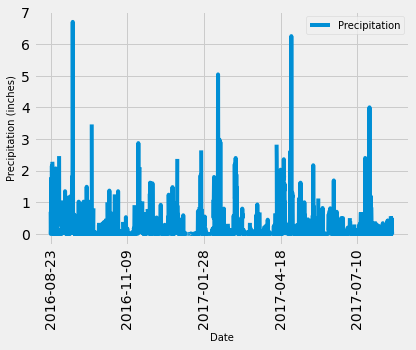

In [47]:
# Use Pandas Plotting with Matplotlib to plot the data
ax = prcp_data_df.plot(rot=90)
ax.set_ylabel("Precipitation (inches)", fontsize = 10)
ax.set_xlabel("Date", fontsize = 10)
plt.legend(['Precipitation'], fontsize=10)
plt.savefig("images/preciptiation2.png")
plt.show()

In [48]:
# Use Pandas to calcualte the summary statistics for the precipitation data
Stat_summary = prcp_data_df['prcp'].describe()
print(Stat_summary)

count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: prcp, dtype: float64


# Exploratory Station Analysis

In [49]:
# Design a query to calculate the total number stations in the dataset
station_count = session.query(stn).group_by(stn.station).count()
print(station_count)

9


In [50]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
Active_Stations = session.query(measur.station, func.count(measur.date)).\
group_by(measur.station).order_by(func.count(measur.date).desc()).first()[0]

Active_Stations

'USC00519281'

In [51]:
# Using the most active station id from the previous query, calculate the lowest,
# highest, and average temperature.

Min = session.query(func.min(measur.tobs)).filter(measur.station == Active_Stations).all()
Max = session.query(func.max(measur.tobs)).filter(measur.station == Active_Stations).all()
Avg = session.query(func.avg(measur.tobs)).filter(measur.station == Active_Stations).all()

print(f"Stats for station USC00519281: Min Temp: {Min}, Max Temp: {Max}, Avg. Temp: {Avg}")

Stats for station USC00519281: Min Temp: [(54.0,)], Max Temp: [(85.0,)], Avg. Temp: [(71.66378066378067,)]


In [52]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
Active_Station_history = session.query(measur.station, measur.date, measur.tobs).\
filter(measur.station == Active_Stations, measur.date >= one_year_ago, measur.date <= most_recent_date).\
order_by(measur.date.desc()).all()

# To organize the data and to print in a more readable format
for history in Active_Station_history:
    print(history)

('USC00519281', '2017-08-18', 79.0)
('USC00519281', '2017-08-17', 76.0)
('USC00519281', '2017-08-16', 76.0)
('USC00519281', '2017-08-15', 77.0)
('USC00519281', '2017-08-14', 77.0)
('USC00519281', '2017-08-13', 77.0)
('USC00519281', '2017-08-06', 83.0)
('USC00519281', '2017-08-05', 82.0)
('USC00519281', '2017-08-04', 77.0)
('USC00519281', '2017-07-31', 76.0)
('USC00519281', '2017-07-30', 81.0)
('USC00519281', '2017-07-29', 82.0)
('USC00519281', '2017-07-28', 81.0)
('USC00519281', '2017-07-27', 76.0)
('USC00519281', '2017-07-26', 75.0)
('USC00519281', '2017-07-25', 77.0)
('USC00519281', '2017-07-24', 75.0)
('USC00519281', '2017-07-23', 82.0)
('USC00519281', '2017-07-22', 77.0)
('USC00519281', '2017-07-21', 77.0)
('USC00519281', '2017-07-20', 77.0)
('USC00519281', '2017-07-19', 76.0)
('USC00519281', '2017-07-18', 76.0)
('USC00519281', '2017-07-17', 76.0)
('USC00519281', '2017-07-16', 80.0)
('USC00519281', '2017-07-15', 80.0)
('USC00519281', '2017-07-14', 76.0)
('USC00519281', '2017-07-13'

In [53]:
Historical_temp_df = pd.DataFrame(Active_Station_history, columns = ['station','date','tobs'])
Historical_temp_df.head()

,station,date,tobs
0,USC00519281,2017-08-18,79.0
1,USC00519281,2017-08-17,76.0
2,USC00519281,2017-08-16,76.0
3,USC00519281,2017-08-15,77.0
4,USC00519281,2017-08-14,77.0


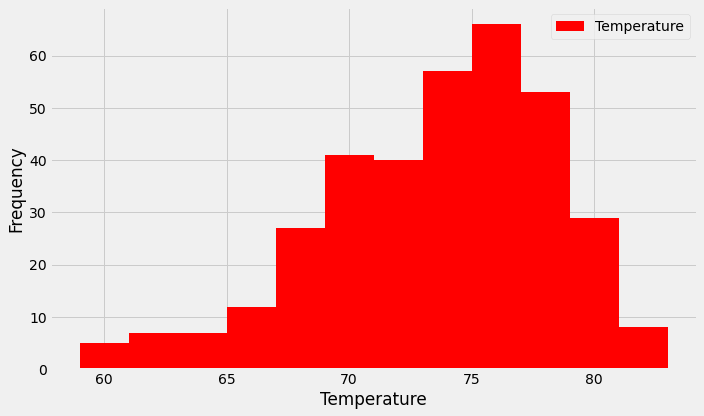

<Figure size 432x288 with 0 Axes>

In [54]:
# Plotting histogram of observed temp.
plt.figure(figsize=(10,6))
plt.hist(Historical_temp_df["tobs"], color = 'red', bins=12)
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.legend(["Temperature"])
plt.tight_layout()
plt.show()

# Save the plot
plt.tight_layout()
plt.savefig("images/frequecy.png")
plt.show()

# Close session

In [21]:
# Close Session
session.close()